In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from glob import glob
from skimage.io import imread

In [2]:
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.style.use('seaborn-v0_8-whitegrid')

In [3]:
base_dir = os.path.join('.', 'dataset')
folders = ['HAM10000_images_part_1', 'HAM10000_images_part_2']
data_df = pd.read_csv(os.path.join(base_dir, 'HAM10000_metadata.csv'))

In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


In [5]:
print(f"Number of NaN values in dataset:\n{data_df.isna().sum()}")

Number of NaN values in dataset:
lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64


In [6]:
data_df['age'].fillna((data_df['age'].mean()), inplace=True)

In [7]:
print(f"Number of NaN values in dataset:\n{data_df.isna().sum()}")

Number of NaN values in dataset:
lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
dtype: int64


In [8]:
data_df.head()

lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear

In [9]:
print(f"Number of duplicates in dataset: {data_df.duplicated().sum()}")

Number of duplicates in dataset: 0


In [10]:
data_df.describe()

age
count  10015.000000
mean      51.863828
std       16.920252
min        0.000000
25%       40.000000
50%       50.000000
75%       65.000000
max       85.000000

In [11]:
data_df['age'].value_counts()

age
45.000000    1299
50.000000    1187
55.000000    1009
40.000000     985
60.000000     803
70.000000     756
35.000000     753
65.000000     731
75.000000     618
30.000000     464
80.000000     404
85.000000     290
25.000000     247
20.000000     169
5.000000       86
15.000000      77
51.863828      57
10.000000      41
0.000000       39
Name: count, dtype: int64

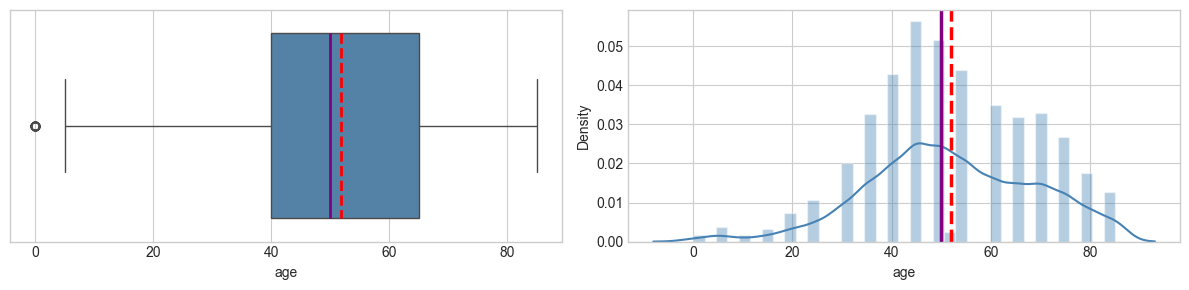

In [12]:
plt.figure(figsize=(12, 3))

plt.subplot(1, 2, 1)
sns.boxplot(data_df["age"], orient='h', color="steelblue", showmeans=True, meanline=True,
                medianprops={'linewidth': 2, 'color': 'purple'},
                meanprops={'linewidth': 2, 'color': 'red'})
plt.subplot(1, 2, 2)
sns.distplot(data_df["age"], color="steelblue")
plt.axvline(x=data_df["age"].mean(), c='red', ls='--', lw=2.5)
plt.axvline(x=data_df["age"].median(), c='purple', ls='-', lw=2.5)

plt.tight_layout()

In [14]:
unique_lesions = data_df['lesion_id'].nunique()
unique_lesions

7470

In [15]:
data_df['dx_type'].value_counts()

dx_type
histo        5340
follow_up    3704
consensus     902
confocal       69
Name: count, dtype: int64

In [16]:
data_df['sex'].value_counts()

sex
male       5406
female     4552
unknown      57
Name: count, dtype: int64

In [17]:
data_df['localization'].value_counts()

localization
back               2192
lower extremity    2077
trunk              1404
upper extremity    1118
abdomen            1022
face                745
chest               407
foot                319
unknown             234
neck                168
scalp               128
hand                 90
ear                  56
genital              48
acral                 7
Name: count, dtype: int64

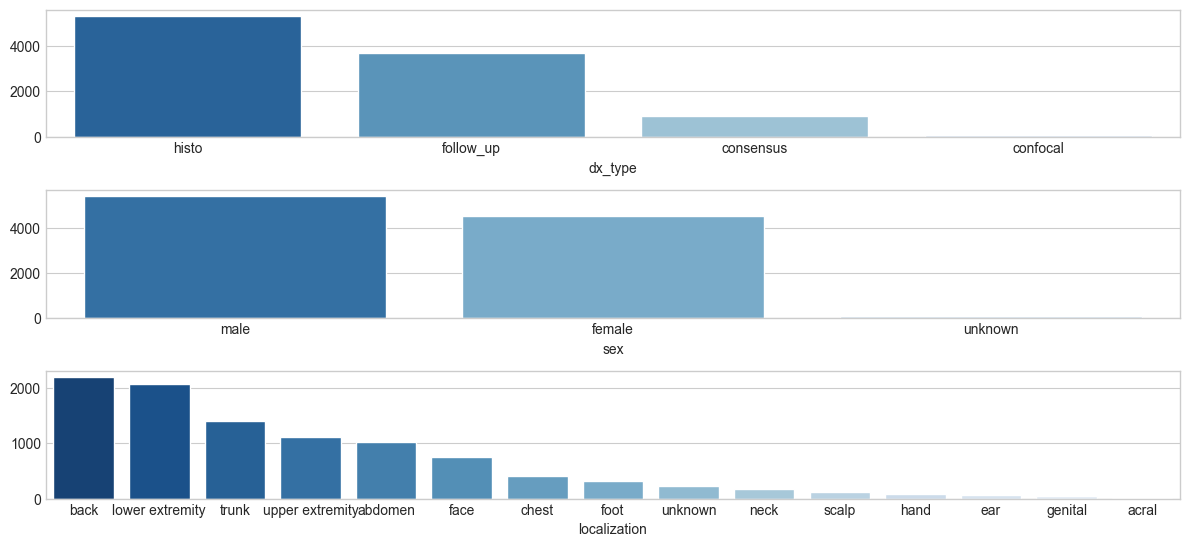

In [18]:
plt.figure(figsize=(12, 7))

for i, feature in enumerate(["dx_type", "sex", "localization"]):
    plt.subplot(4, 1, i+1)
    counts = data_df[feature].value_counts()
    sns.barplot(x=counts.index, y=counts.values, palette="Blues_r")

plt.tight_layout()

In [19]:
data_df['dx'].value_counts()

dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64

In [20]:
dx_dict = {
    'nv': 'Melanocytic nevus',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratosis',
    'vasc': 'Vascular lesion',
    'df': 'Dermatofibroma'
}

data_df['diagnosis'] = data_df['dx'].map(dx_dict.get)

In [21]:
data_df['diagnosis'].value_counts()

diagnosis
Melanocytic nevus       6705
Melanoma                1113
Benign keratosis        1099
Basal cell carcinoma     514
Actinic keratosis        327
Vascular lesion          142
Dermatofibroma           115
Name: count, dtype: int64

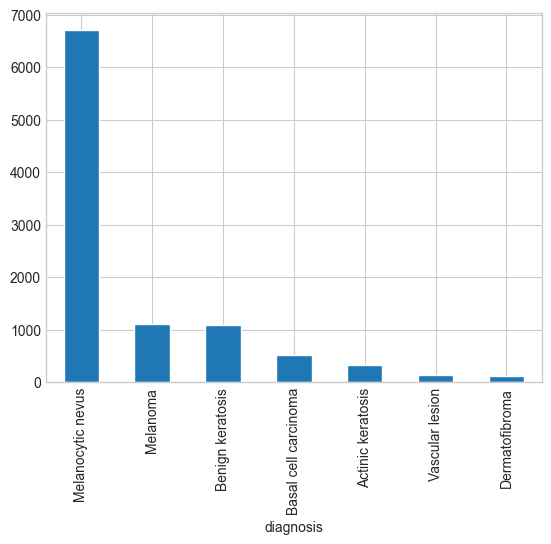

In [22]:
data_df['diagnosis'].value_counts().plot(kind='bar')
plt.show()

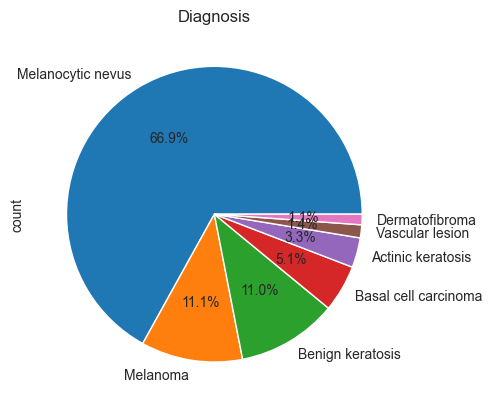

In [23]:
plt.title("Diagnosis")
data_df['diagnosis'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

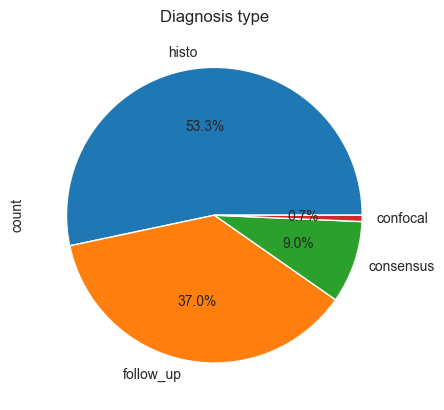

In [24]:
data_df['dx_type'].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("Diagnosis type")
plt.show()

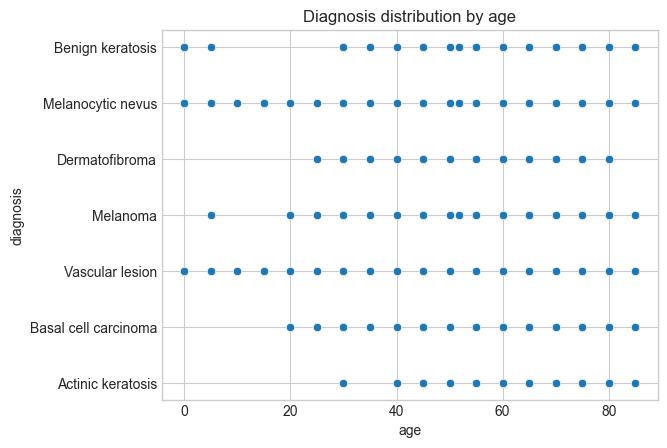

In [25]:
sns.scatterplot(x='age', y='diagnosis', data=data_df)
plt.title('Diagnosis distribution by age')
plt.show()

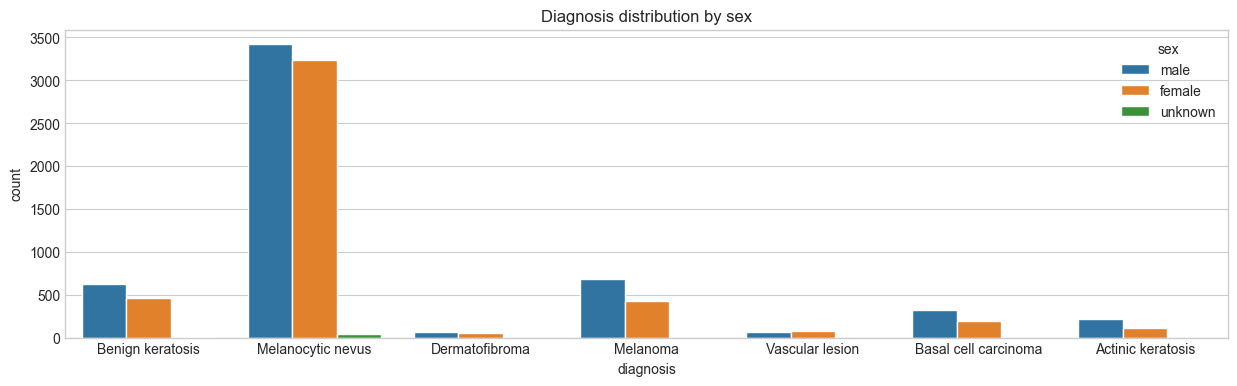

In [26]:
plt.figure(figsize = (15, 4))
sns.countplot(x="diagnosis", hue="sex", data=data_df)
plt.title('Diagnosis distribution by sex')
plt.show()

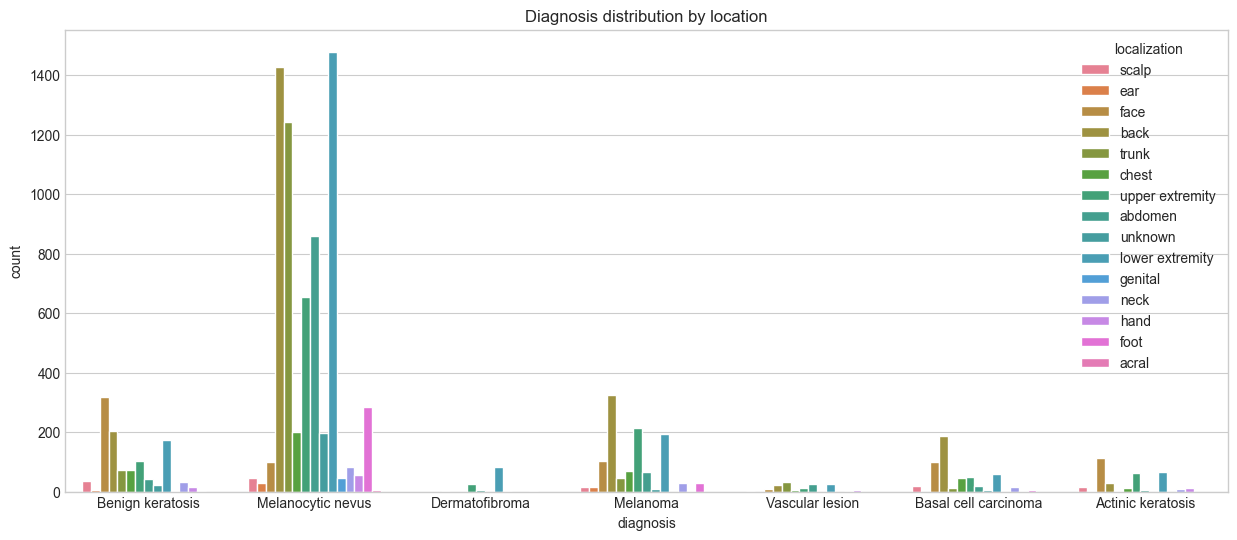

In [27]:
fig = plt.figure(figsize = (15, 6))
sns.countplot(x="diagnosis", hue="localization", data=data_df)
plt.title('Diagnosis distribution by location')
plt.show()

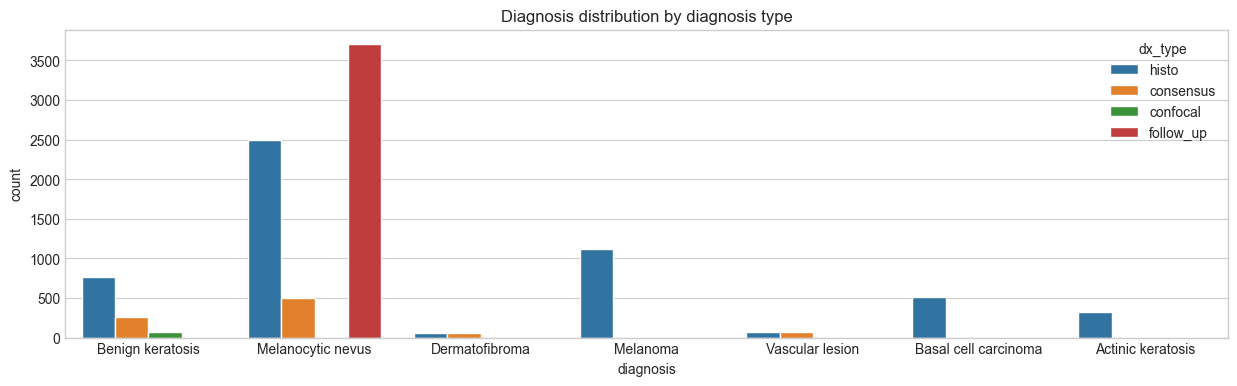

In [28]:
fig = plt.figure(figsize = (15, 4))
sns.countplot(x="diagnosis", hue="dx_type", data=data_df)
plt.title('Diagnosis distribution by diagnosis type')
plt.show()

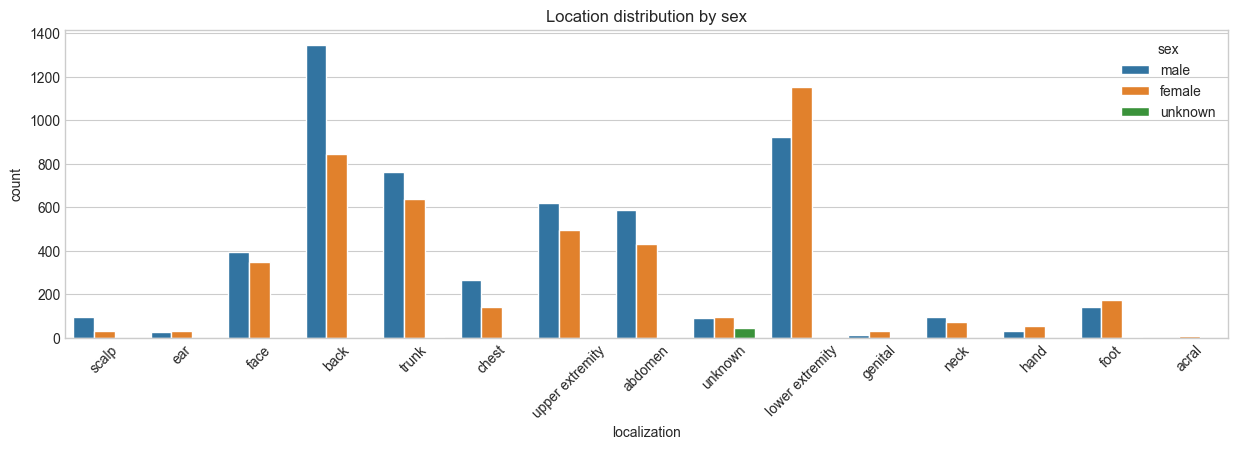

In [29]:
fig = plt.figure(figsize=(15, 4))
sns.countplot(x="localization", hue="sex", data=data_df)
plt.xticks(rotation=45)
plt.title('Location distribution by sex')
plt.show()

In [30]:
jpg_files = []
for folder in folders:
    jpg_files.extend(glob(os.path.join(base_dir, folder, '*.jpg')))

imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in jpg_files}

data_df['path'] = data_df['image_id'].map(imageid_path_dict.get)
data_df['image'] = data_df['path'].map(imread)
data_df['image'].map(lambda x: x.shape).value_counts()

image
(450, 600, 3)    10015
Name: count, dtype: int64

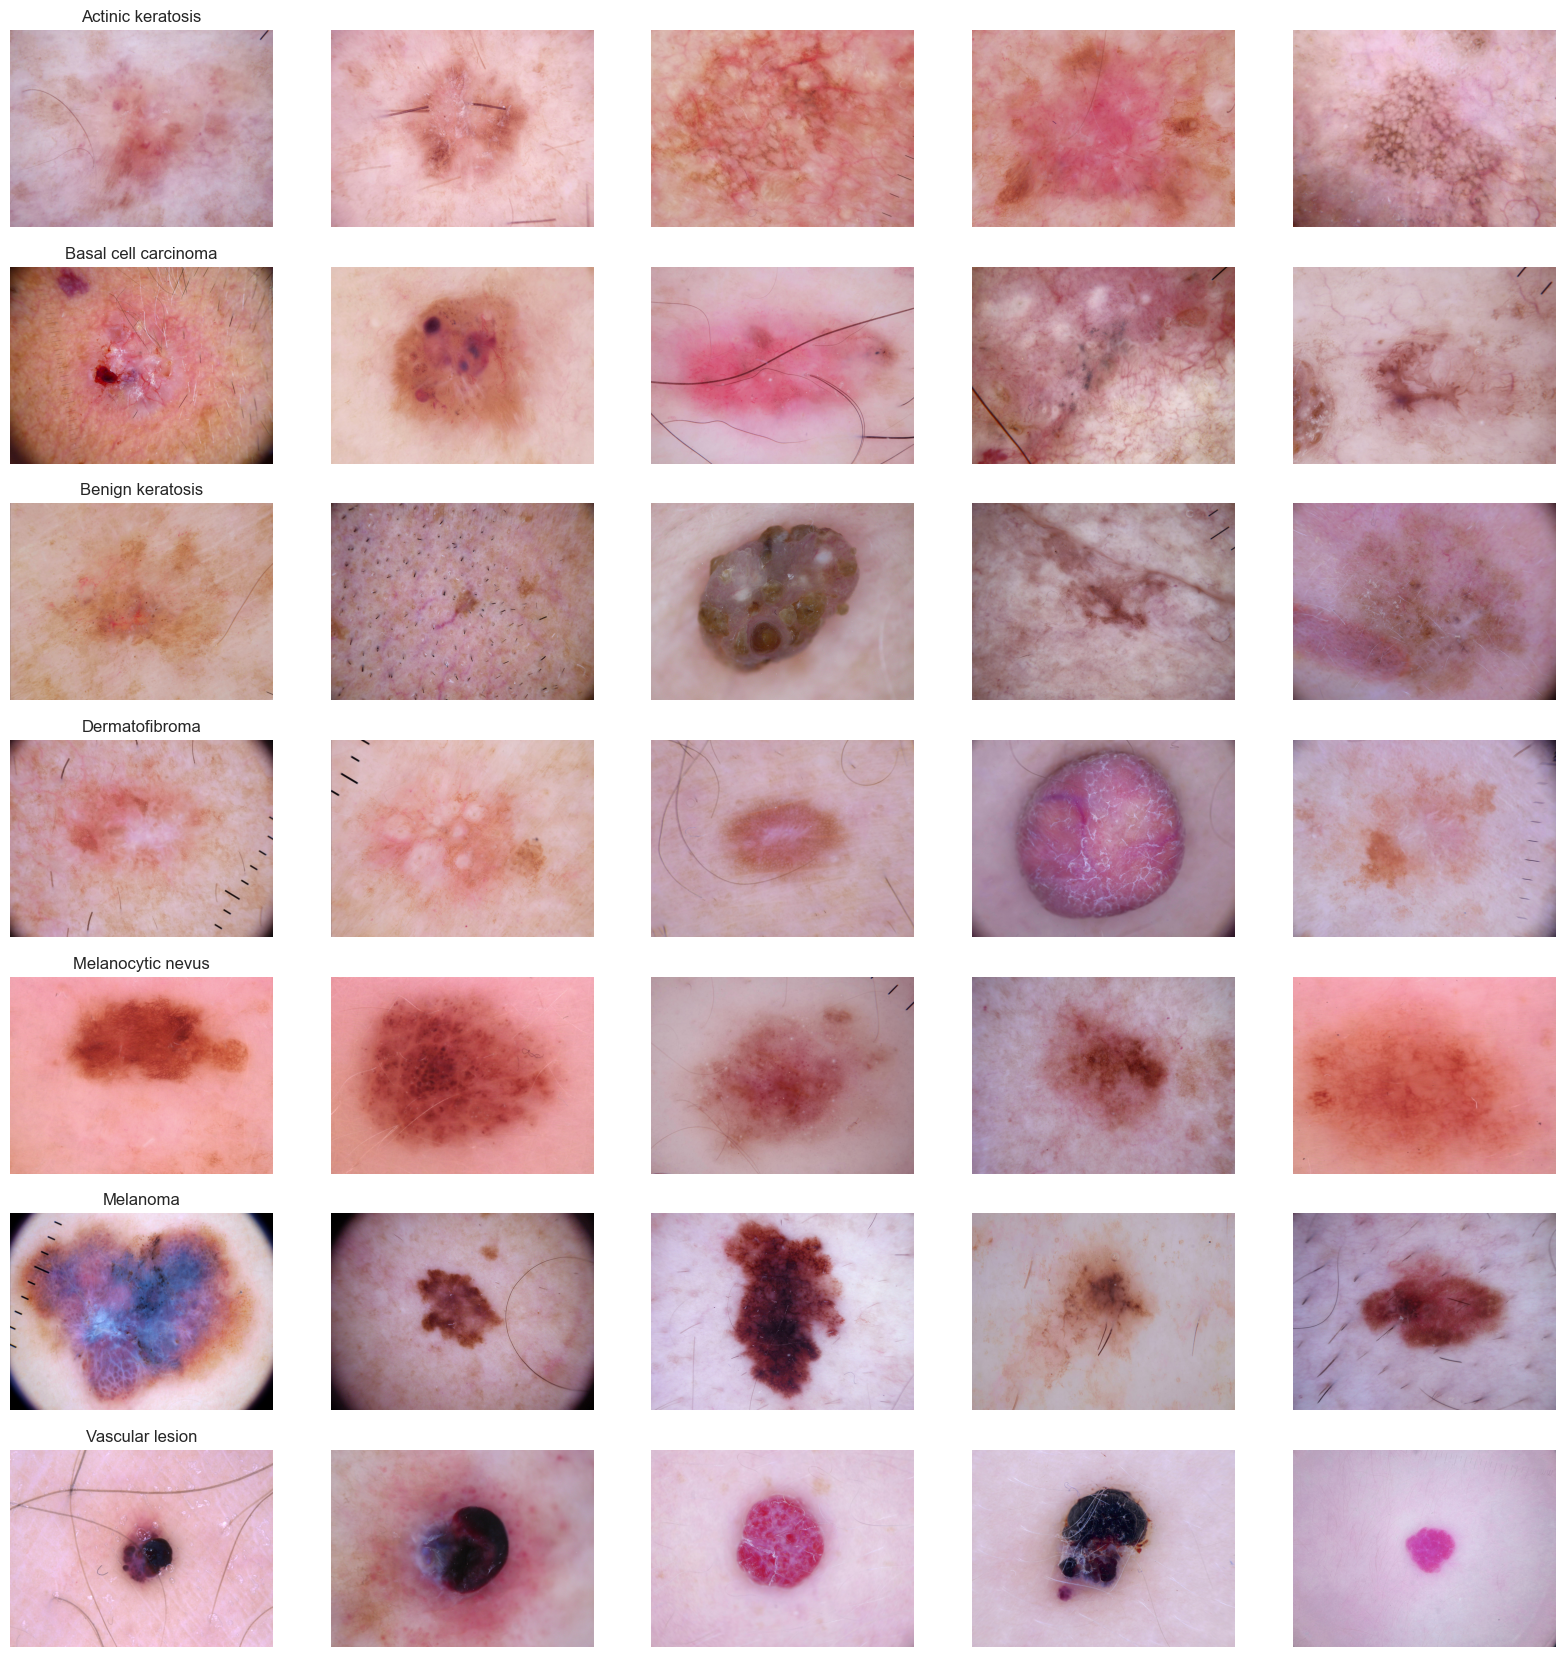

In [31]:
n_samples = 5
fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))
for n_axs, (type_name, type_rows) in zip(m_axs, data_df.sort_values(['diagnosis']).groupby('diagnosis')):
    n_axs[0].set_title(type_name)
    
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=2018).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')